**Import necessary libraries for the project.**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Import and read Health facility(df), Mortality rate(mrate) datasets**



In [16]:
# Try reading the file with different encodings
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'utf-16']

for encoding in encodings:
    try:
        df = pd.read_csv('/content/healthcare_facilities.csv', encoding=encoding)
        mrate = pd.read_excel('/content/Infant-Mortality-Rates-per-1000-live-births-by-Sex-and-County-2019.xlsx')
        print("File read successfully with encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Error decoding with encoding:", encoding)
        continue

Error decoding with encoding: utf-8
File read successfully with encoding: latin1


**Exploring Health Facilities data**

#### Display first five rows in the dataset


In [17]:
df.head()

,OBJECTID,Facility_N,Type,Owner,County,Sub_County,Division,Location,Sub_Locati,Constituen,Nearest_To,Latitude,Longitude
0,1,CDF Kiriari Dispensary,Dispensary,Ministry of Health,Embu,Manyatta,Manyatta,Ruguru,Ruguru,MANYATTA,Kiriari -market,-0.39940,37.47605
1,2,St Jude's Huruma Community Health Services,Medical Clinic,Private Practice - Unspecified,Nairobi,Mathare,Huruma,Huruma,Huruma,MATHARE,Kariobangi Market,-1.26174,36.87765
2,3,12 Engineers,Dispensary,Ministry of Health,Kiambu,Thika West,,,,JUJA,,-1.07354,37.14413
3,4,3Kl Maternity & Nursing Home,Nursing Home,Private Practice - Clinical Officer,Kajiado,Kajiado North,Ongata Rongai,Gataka,Gataka,KAJIADO NORTH,Ongata Ronga,-1.37570,36.72277
4,5,8Th Street Clinic,Medical Clinic,Private Enterprise (Institution),Kajiado,Kajiado North,Isinya,Isinya,Isinya Township,KAJIADO NORTH,Isinya,-1.41187,36.50854


### Check for the number of rows and columns in the dataset

In [18]:
df.shape

(10013, 13)

### Check for the number of null values in the health facilities dataset

In [19]:
df.isnull().sum()

OBJECTID      0
Facility_N    0
Type          0
Owner         0
County        0
Sub_County    0
Division      0
Location      0
Sub_Locati    0
Constituen    0
Nearest_To    0
Latitude      0
Longitude     0
dtype: int64

### Check for the number total health facilities in each county

In [20]:
df.groupby('County').size()

County
Baringo            221
Bomet              137
Bungoma            176
Busia              115
Elgeyo Marakwet    129
Embu               175
Garissa            156
Homa Bay           227
Isiolo              52
Kajiado            296
Kakamega           270
Kericho            211
Kiambu             483
Kilifi             253
Kirinyaga          237
Kisii              168
Kisumu             202
Kitui              402
Kwale              120
Laikipia           110
Lamu                46
Machakos           356
Makueni            280
Mandera             84
Marsabit           113
Meru               444
Migori             219
Mombasa            306
Murang'a           264
Nairobi            883
Nakuru             408
Nandi              201
Narok              172
Nyamira            137
Nyandarua          141
Nyeri              416
Samburu             93
Siaya              169
Taita Taveta        81
Tana River          58
Tharaka Nithi      130
Trans Nzoia        151
Turkana            167
Uasi

#Creating visualizations


**Task 1: Current geographic distribution of health facilities in Kenya per county**

####Visualization 1 - Scatter plot

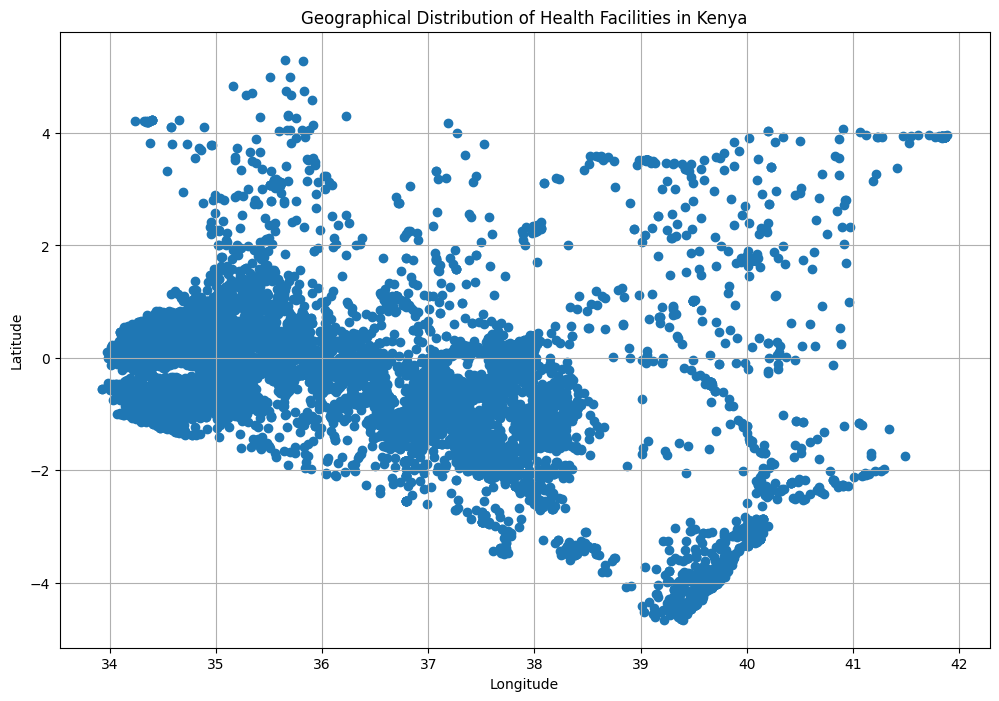

In [21]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Longitude'], df['Latitude'])
plt.title('Geographical Distribution of Health Facilities in Kenya')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

####Visualization 2-Heat map

In [22]:
#Import folium and folium.plugins
import folium
from folium.plugins import HeatMap

In [23]:
# Initialize a map centered around Kenya and create a list of locations for the heat map
kenya = folium.Map(location=[0.0236, 37.9062], zoom_start=6)
locations = df[['Latitude', 'Longitude']].values.tolist()
HeatMap(locations).add_to(kenya)

# Save and display the map
kenya.save('kenya_heatmap.html')
kenya

**Task 2: a.What are the ten counties with the least
number of health facilities?**


####Count the number of health facilities in each county and sort them in ascending order

In [24]:
# Count the number of health facilities in each county
facility_counts = df['County'].value_counts().reset_index()
facility_counts.columns = ['County', 'Facility_N']

# Sort the counties by the number of health facilities in ascending order and get the 10 counties with the least number of health facilities
least_counties = facility_counts.sort_values(by='Facility_N', ascending=True).head(10)

####Plotting the Barchart

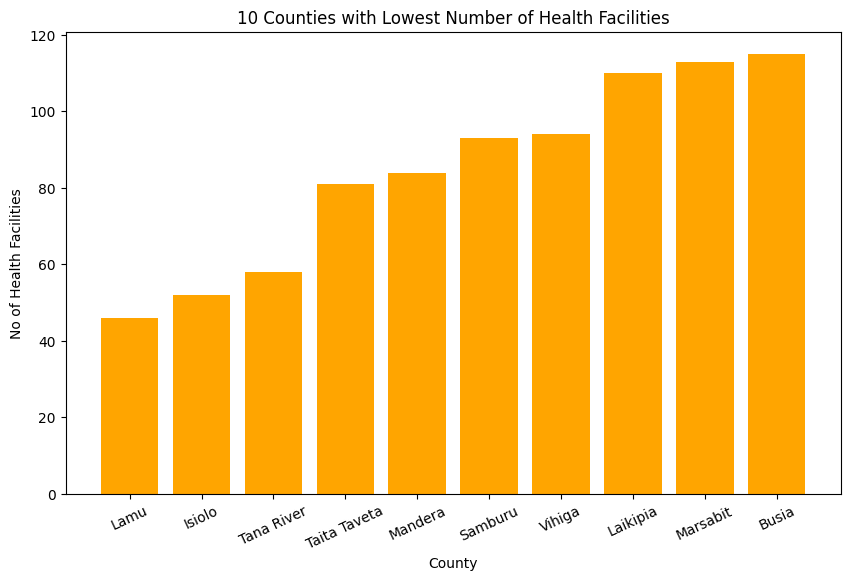

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(least_counties['County'], least_counties['Facility_N'], color='orange')
plt.xlabel('County')
plt.ylabel('No of Health Facilities')
plt.title('10 Counties with Lowest Number of Health Facilities')
plt.xticks(rotation=25)
plt.show()

**Task 2: b.What are the ten counties with the
highest mortality rates?:**


####Select and calculate the average of the male and female columns in the infant mortality rates dataset

In [26]:
# Select the columns
male_column = 'male'
female_column = 'female'

# Calculate the average mortality rate for each county
mrate['average_mortality'] = (mrate[male_column] + mrate[female_column]) / 2

####Select the top 10 counties with highest average mortality rates

In [27]:
top_ten_counties = mrate.nlargest(10, 'average_mortality')

####Plotting the bar chart

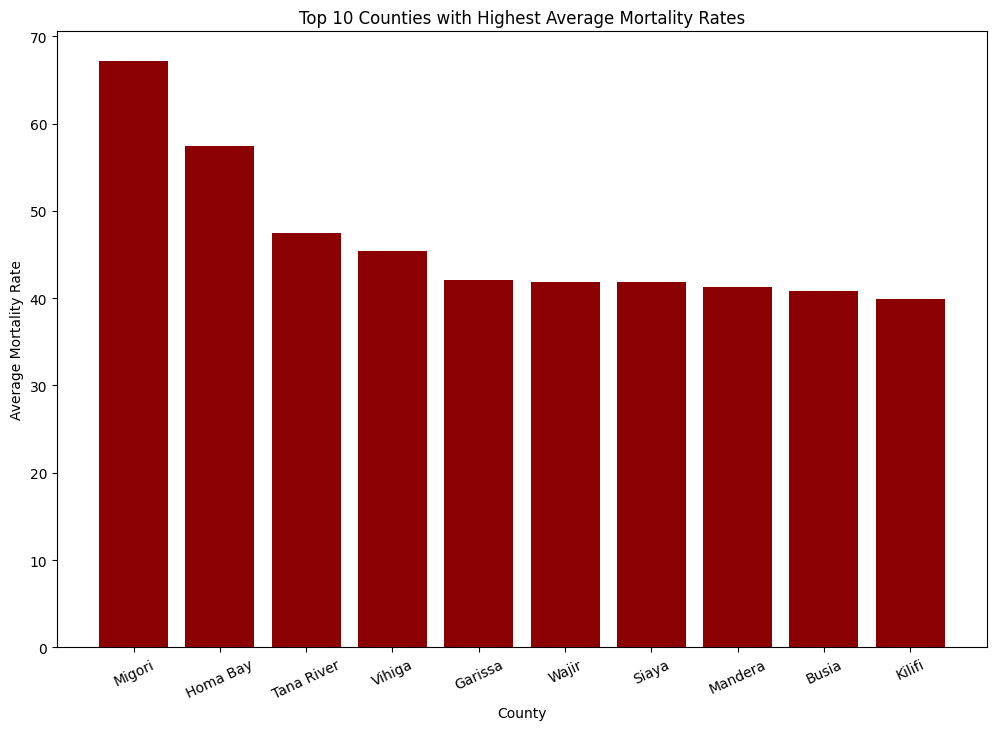

In [28]:
plt.figure(figsize=(12, 8))
plt.bar(top_ten_counties['county'], top_ten_counties['average_mortality'], color='darkred')
plt.xlabel('County')
plt.ylabel('Average Mortality Rate')
plt.title('Top 10 Counties with Highest Average Mortality Rates')
plt.xticks(rotation=25)
plt.show()


**Task 3: Comparison of male vs female infant
mortality rates per county**


####Visualization - Line Graph

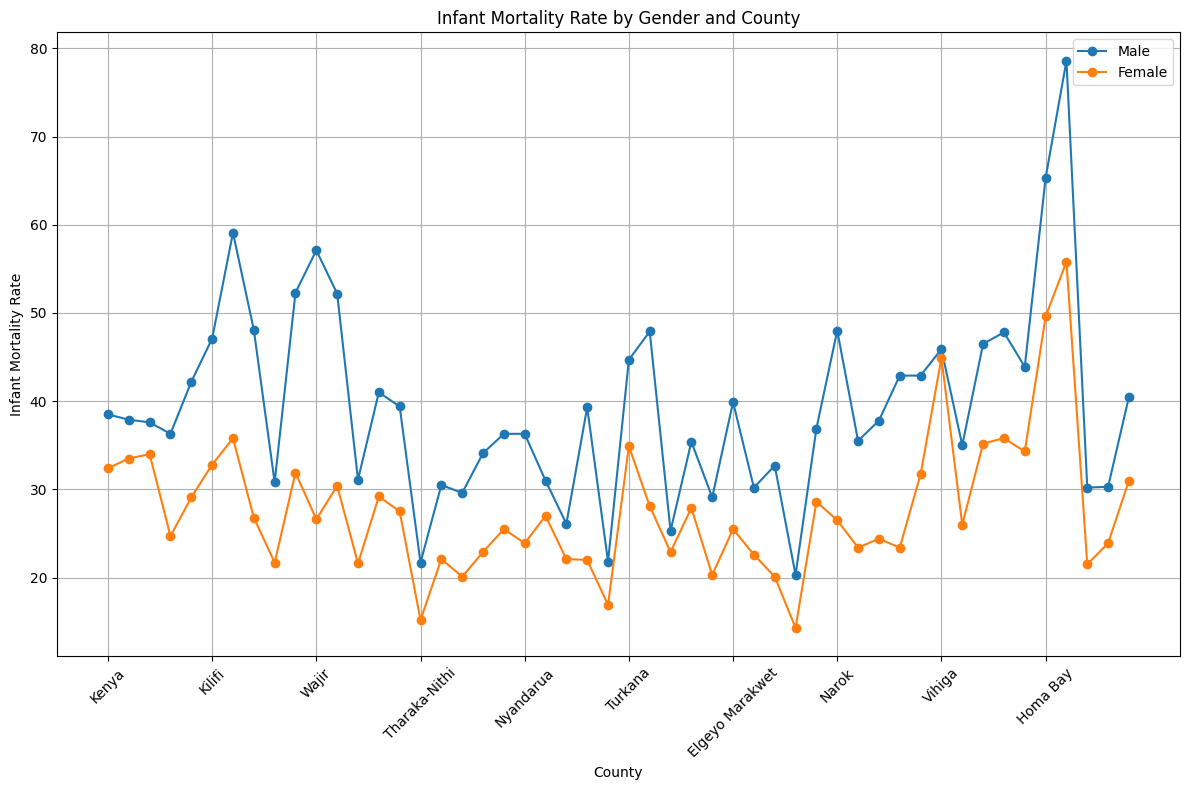

In [29]:
plt.figure(figsize=(12, 8))

# Plot male and female infant mortality rates
plt.plot(mrate['county'], mrate['male'], marker='o', label='Male')
plt.plot(mrate['county'], mrate['female'], marker='o', label='Female')

# Customize the line graph
plt.xlabel('County')
plt.ylabel('Infant Mortality Rate')
plt.title('Infant Mortality Rate by Gender and County')
plt.xticks(rotation=45)

#set to display every 5th label
plt.xticks(range(0, len(mrate['county']), 5), mrate['county'][::5], rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
